## Transformer-based AMC

In [14]:
# import packets.
import torch
import torch.optim as optim
import torch.nn.functional as F
import sys, os
import numpy as np
import torch.nn as nn
import h5py
import torch.utils.data as utils
from torch.utils.data.sampler import SubsetRandomSampler
import random
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import sklearn.metrics as skm


In [15]:
# functions will be used.
tep = 512
def output_s(message, save_filename):
    print (message)
    with open(save_filename, 'a') as out:
        out.write(message + '\n')

def test(testset):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    test_loader = utils.DataLoader(testset, batch_size=32)
    predict = []
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.cuda(), target.cuda()
            output = model(data)
            target = target.squeeze_()
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
            predict.extend(predicted)
        message = ('\nTest set: SNR : {} , Accuracy: {}/{} ({:.3f}%)\n'.format(
            snr, correct, total, 100. * correct / total))
        output_s(message, 'test_msg.txt')
        return correct / total, predict


def create_label(num):
    mods = range(24)
    mo = []
    for m in mods:
        mo.append([m] * num * 26)
    mo = np.expand_dims(np.hstack(mo), axis=1)
    snr = []
    for m in range(24):
        for i in range( -20, 32, 2 ):
            snr.append([i] * tep)

    return mo, np.hstack(snr)


def gen_test_set(dataset):

    x = h5py.File(dataset, 'r+')
    labels, snrs = create_label(tep)
    data_test0 = np.asarray(x['test_scf'])

    return data_test0, labels, snrs


In [16]:
data_test0, label_test0, snr_test = gen_test_set('gen_set/201801a_scf_256_test.h5')
cr = []
fm = []
cm_idx = ['OOK','4ASK','8ASK','BPSK','QPSK','8PSK','16PSK','32PSK','16APSK','32APSK',  
          '64APSK','128APSK','16QAM','32QAM','64QAM','128QAM','256QAM','AM-SSB-WC',
          'AM-SSB-SC','AM-DSB-WC','AM-DSB-SC','FM','GMSK','OQPSK']

In [17]:
# import model
torch.cuda.set_device(1)
model = torch.load('outputs/scf_rt_d_64_h_2_t_LSTM_ksize_8_level_2_n_2_lr_0.0001_dropout_0.001_bs_32.pt')
model.cuda()

scf_rt(
  (encoder): Linear(in_features=2, out_features=64, bias=True)
  (rt): RTransformer(
    (forward_net): Sequential(
      (0): Block(
        (layers): ModuleList(
          (0): LocalRNNLayer(
            (local_rnn): LocalRNN(
              (rnn): LSTM(64, 64, batch_first=True)
            )
            (connection): SublayerConnection(
              (norm): LayerNorm()
              (dropout): Dropout(p=0.001, inplace=False)
            )
          )
          (1): LocalRNNLayer(
            (local_rnn): LocalRNN(
              (rnn): LSTM(64, 64, batch_first=True)
            )
            (connection): SublayerConnection(
              (norm): LayerNorm()
              (dropout): Dropout(p=0.001, inplace=False)
            )
          )
        )
        (connections): ModuleList(
          (0): SublayerConnection(
            (norm): LayerNorm()
            (dropout): Dropout(p=0.001, inplace=False)
          )
          (1): SublayerConnection(
            (norm): LayerN

### codes below start to test classifier vs per snr.


Test set: SNR : -20 , Accuracy: 542/12288 (4.411%)

snr -20 finished, test acc: 4.4 % 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.01953125, 0.0, 0.0, 0.00390625, 0.080078125, 0.0, 0.048828125, 0.345703125, 0.0, 0.16015625, 0.0, 0.0, 0.03125, 0.0, 0.0, 0.03515625, 0.005859375, 0.0, 0.02734375, 0.025390625, 0.017578125, 0.037109375, 0.1171875, 0.103515625]


<Figure size 1800x1800 with 0 Axes>

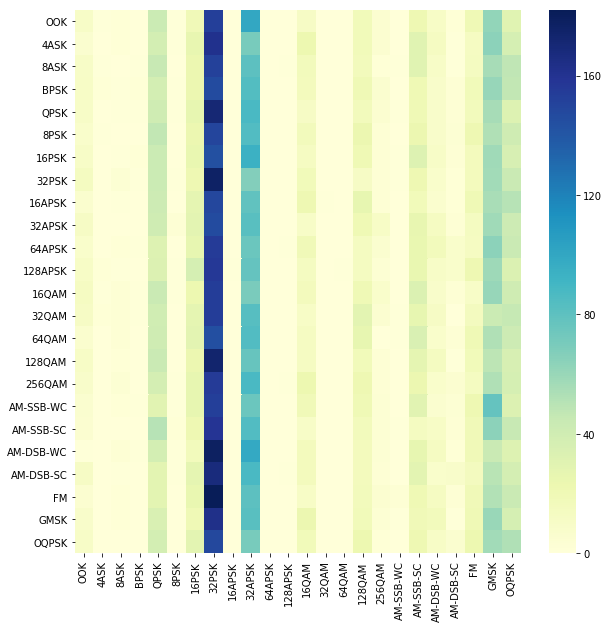


Test set: SNR : -18 , Accuracy: 503/12288 (4.093%)

snr -18 finished, test acc: 4.1 % 

[0.009765625, 0.0, 0.0078125, 0.0, 0.06640625, 0.0, 0.048828125, 0.30859375, 0.0, 0.1484375, 0.001953125, 0.0, 0.0390625, 0.0, 0.0, 0.03515625, 0.009765625, 0.0, 0.041015625, 0.0234375, 0.013671875, 0.044921875, 0.115234375, 0.068359375]


<Figure size 1800x1800 with 0 Axes>

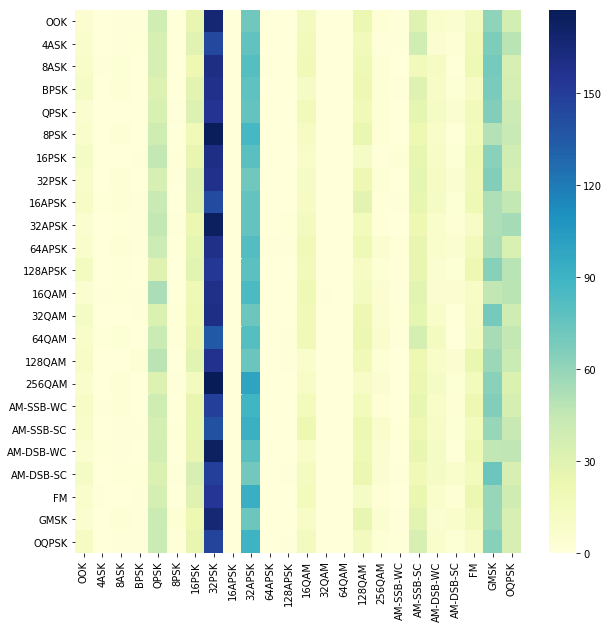


Test set: SNR : -16 , Accuracy: 565/12288 (4.598%)

snr -16 finished, test acc: 4.6 % 

[0.029296875, 0.0, 0.005859375, 0.0, 0.06640625, 0.00390625, 0.0625, 0.30859375, 0.0, 0.158203125, 0.0, 0.0, 0.029296875, 0.0, 0.0, 0.041015625, 0.015625, 0.001953125, 0.064453125, 0.02734375, 0.01171875, 0.05078125, 0.146484375, 0.080078125]


<Figure size 1800x1800 with 0 Axes>

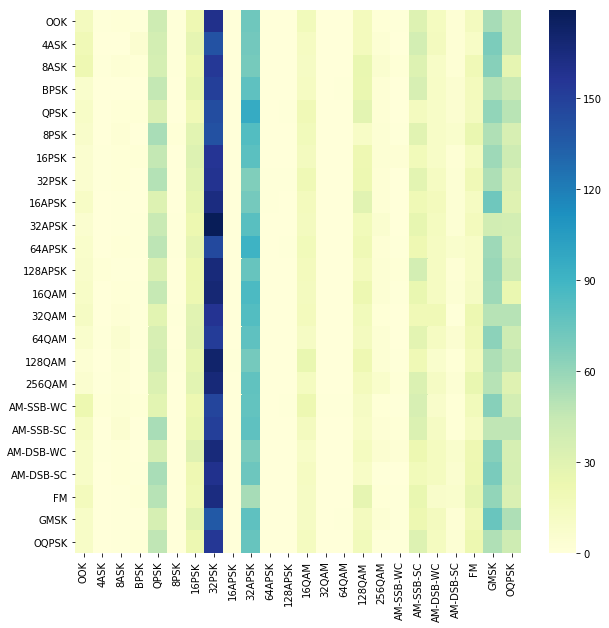


Test set: SNR : -14 , Accuracy: 607/12288 (4.940%)

snr -14 finished, test acc: 4.9 % 

[0.0546875, 0.001953125, 0.015625, 0.001953125, 0.06640625, 0.001953125, 0.05078125, 0.310546875, 0.0, 0.154296875, 0.0, 0.0, 0.02734375, 0.0, 0.0, 0.0390625, 0.005859375, 0.0, 0.09765625, 0.048828125, 0.015625, 0.083984375, 0.107421875, 0.1015625]


<Figure size 1800x1800 with 0 Axes>

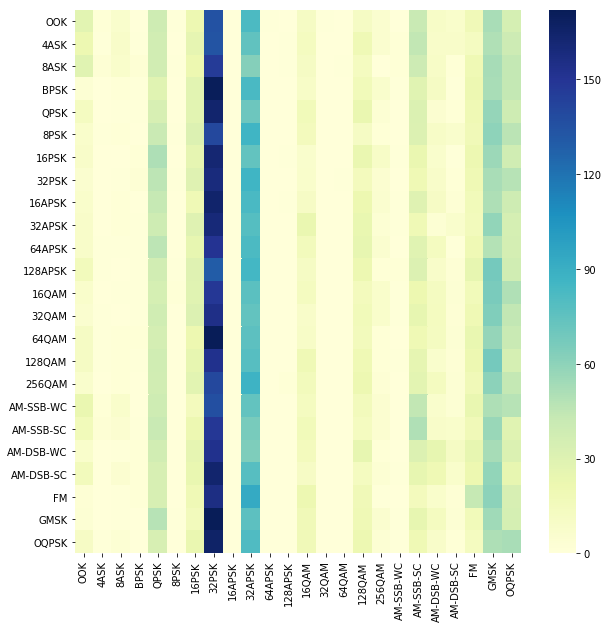


Test set: SNR : -12 , Accuracy: 767/12288 (6.242%)

snr -12 finished, test acc: 6.2 % 

[0.119140625, 0.0234375, 0.03125, 0.005859375, 0.083984375, 0.0, 0.060546875, 0.291015625, 0.0, 0.15625, 0.0, 0.0, 0.041015625, 0.0, 0.0, 0.0390625, 0.01171875, 0.0078125, 0.125, 0.111328125, 0.029296875, 0.158203125, 0.09765625, 0.10546875]


<Figure size 1800x1800 with 0 Axes>

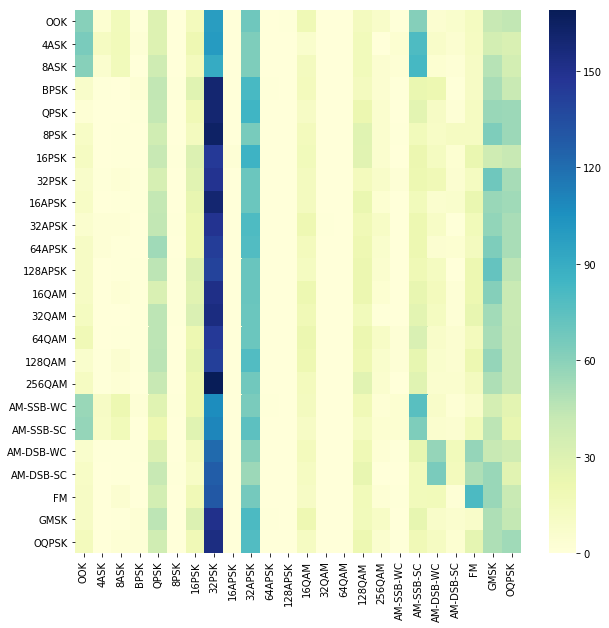


Test set: SNR : -10 , Accuracy: 1302/12288 (10.596%)

snr -10 finished, test acc: 10.6 % 

[0.26953125, 0.095703125, 0.0625, 0.001953125, 0.099609375, 0.0, 0.060546875, 0.283203125, 0.0, 0.154296875, 0.0, 0.0, 0.0234375, 0.0, 0.0, 0.052734375, 0.02734375, 0.052734375, 0.267578125, 0.359375, 0.076171875, 0.443359375, 0.099609375, 0.11328125]


<Figure size 1800x1800 with 0 Axes>

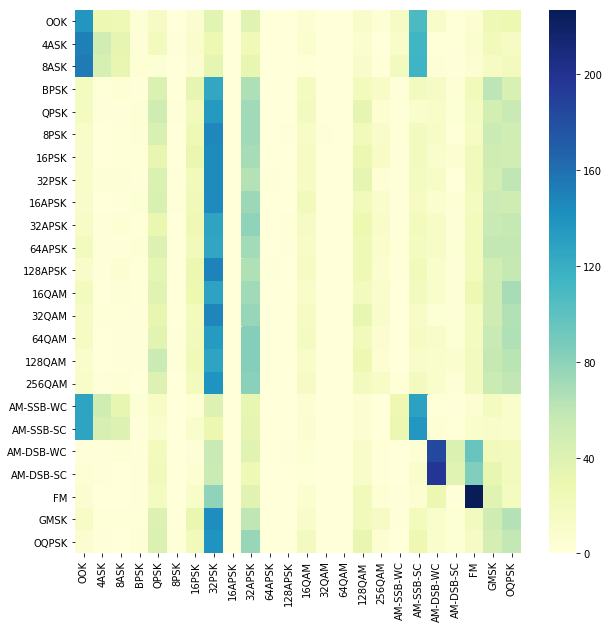


Test set: SNR : -8 , Accuracy: 2118/12288 (17.236%)

snr -8 finished, test acc: 17.2 % 

[0.501953125, 0.224609375, 0.060546875, 0.017578125, 0.09375, 0.001953125, 0.05078125, 0.177734375, 0.0, 0.12890625, 0.0, 0.0, 0.0390625, 0.0, 0.0, 0.087890625, 0.06640625, 0.220703125, 0.353515625, 0.541015625, 0.375, 0.91796875, 0.10546875, 0.171875]


<Figure size 1800x1800 with 0 Axes>

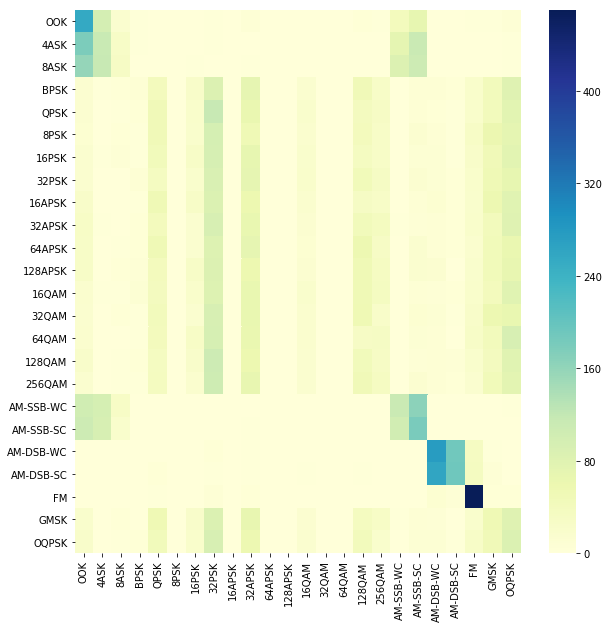


Test set: SNR : -6 , Accuracy: 2348/12288 (19.108%)

snr -6 finished, test acc: 19.1 % 

[0.42578125, 0.298828125, 0.083984375, 0.05078125, 0.087890625, 0.0, 0.013671875, 0.0546875, 0.0, 0.04296875, 0.0, 0.001953125, 0.01171875, 0.0, 0.0, 0.12890625, 0.2109375, 0.19921875, 0.697265625, 0.201171875, 0.779296875, 1.0, 0.142578125, 0.154296875]


<Figure size 1800x1800 with 0 Axes>

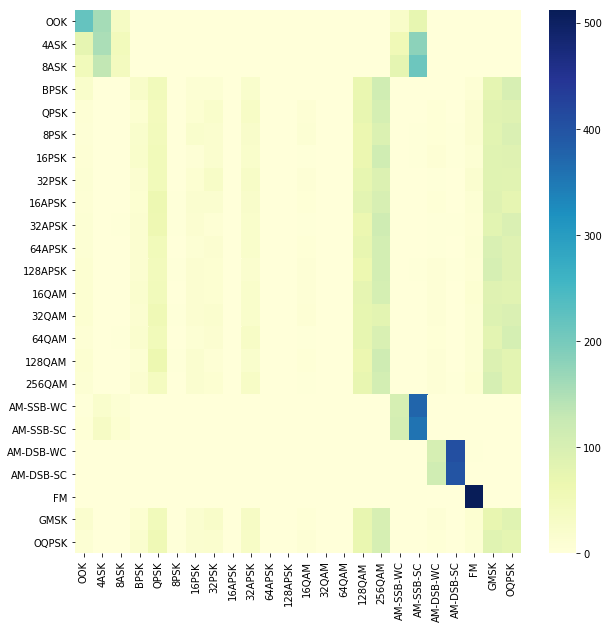


Test set: SNR : -4 , Accuracy: 3062/12288 (24.919%)

snr -4 finished, test acc: 24.9 % 

[0.65234375, 0.412109375, 0.3984375, 0.353515625, 0.09375, 0.021484375, 0.03125, 0.0, 0.0, 0.017578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017578125, 0.3359375, 0.015625, 0.96875, 0.677734375, 0.384765625, 1.0, 0.47265625, 0.126953125]


<Figure size 1800x1800 with 0 Axes>

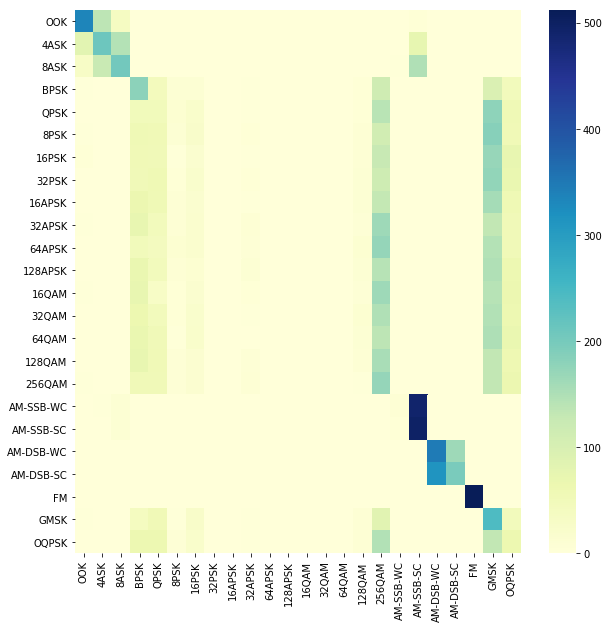


Test set: SNR : -2 , Accuracy: 3665/12288 (29.826%)

snr -2 finished, test acc: 29.8 % 

[0.892578125, 0.505859375, 0.580078125, 0.66796875, 0.0859375, 0.009765625, 0.1328125, 0.041015625, 0.00390625, 0.013671875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.119140625, 0.806640625, 0.3203125, 0.486328125, 0.625, 1.0, 0.720703125, 0.134765625]


<Figure size 1800x1800 with 0 Axes>

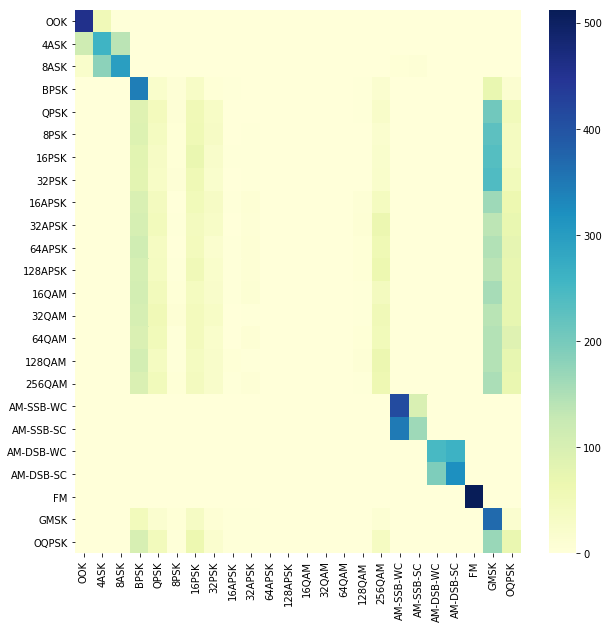


Test set: SNR : 0 , Accuracy: 4227/12288 (34.399%)

snr 0 finished, test acc: 34.4 % 

[0.919921875, 0.681640625, 0.626953125, 0.89453125, 0.029296875, 0.0, 0.0703125, 0.123046875, 0.0, 0.08984375, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.275390625, 0.826171875, 0.427734375, 0.6015625, 0.716796875, 1.0, 0.724609375, 0.24609375]


<Figure size 1800x1800 with 0 Axes>

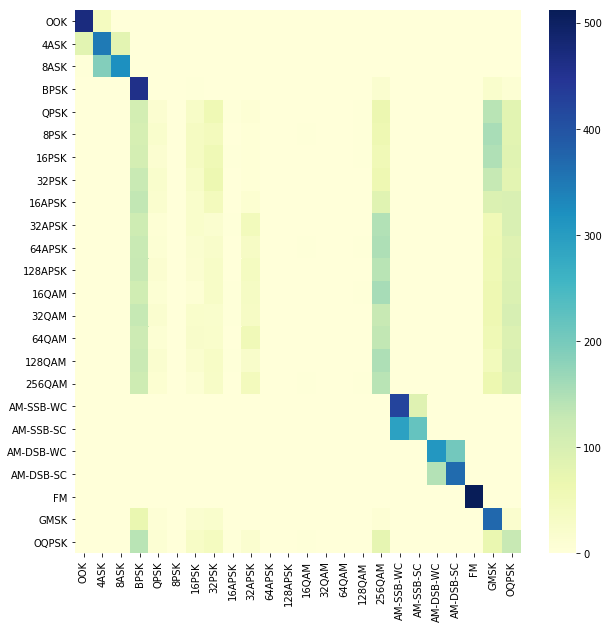


Test set: SNR : 2 , Accuracy: 4660/12288 (37.923%)

snr 2 finished, test acc: 37.9 % 

[0.958984375, 0.759765625, 0.66015625, 0.87109375, 0.00390625, 0.0, 0.0625, 0.29296875, 0.01171875, 0.2109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.279296875, 0.84765625, 0.439453125, 0.810546875, 0.662109375, 1.0, 0.78515625, 0.4453125]


<Figure size 1800x1800 with 0 Axes>

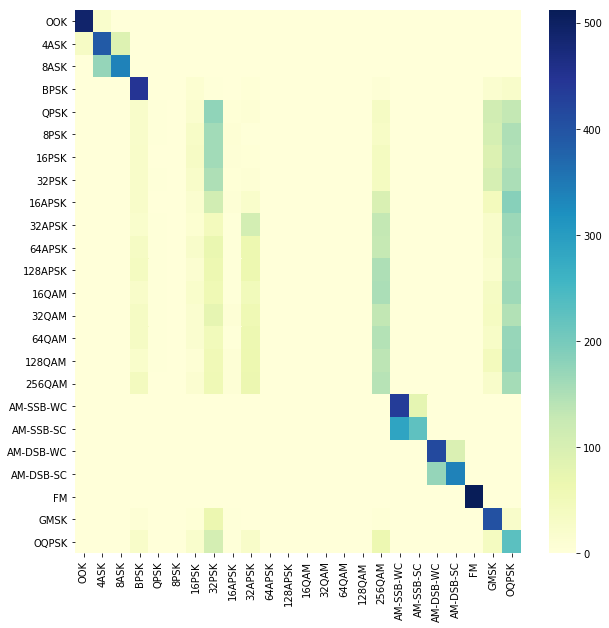


Test set: SNR : 4 , Accuracy: 5018/12288 (40.837%)

snr 4 finished, test acc: 40.8 % 

[0.94921875, 0.796875, 0.646484375, 0.908203125, 0.001953125, 0.001953125, 0.015625, 0.5234375, 0.06640625, 0.123046875, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.02734375, 0.447265625, 0.740234375, 0.505859375, 0.89453125, 0.7578125, 1.0, 0.904296875, 0.486328125]


<Figure size 1800x1800 with 0 Axes>

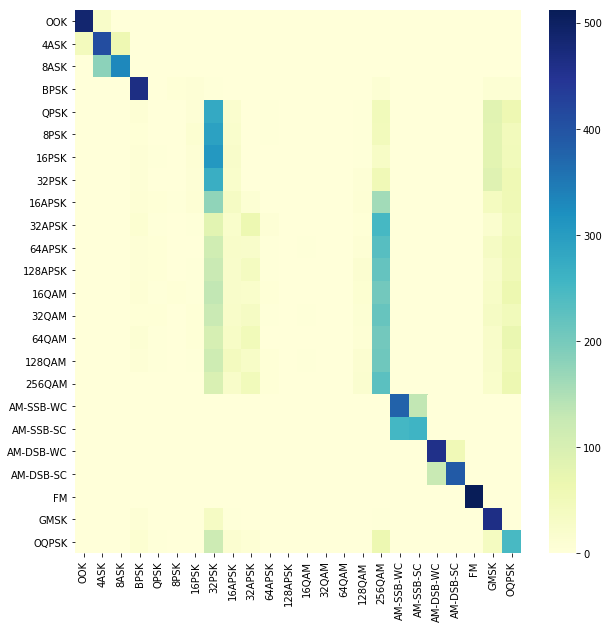


Test set: SNR : 6 , Accuracy: 5268/12288 (42.871%)

snr 6 finished, test acc: 42.9 % 

[0.8984375, 0.650390625, 0.76171875, 0.919921875, 0.044921875, 0.0234375, 0.001953125, 0.478515625, 0.1328125, 0.3046875, 0.015625, 0.029296875, 0.00390625, 0.0, 0.0, 0.072265625, 0.359375, 0.724609375, 0.572265625, 0.931640625, 0.728515625, 1.0, 0.857421875, 0.77734375]


<Figure size 1800x1800 with 0 Axes>

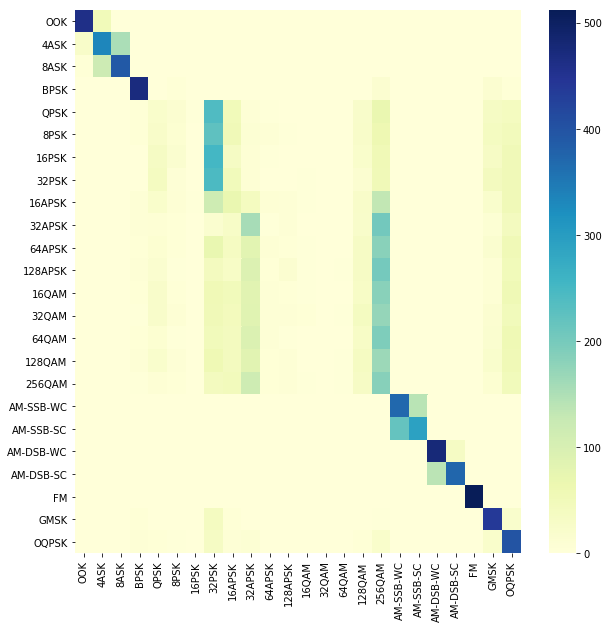


Test set: SNR : 8 , Accuracy: 5355/12288 (43.579%)

snr 8 finished, test acc: 43.6 % 

[0.91015625, 0.65625, 0.751953125, 0.921875, 0.00390625, 0.03125, 0.076171875, 0.6015625, 0.1015625, 0.064453125, 0.015625, 0.033203125, 0.0, 0.0, 0.0, 0.064453125, 0.294921875, 0.81640625, 0.59375, 0.9453125, 0.76953125, 1.0, 0.919921875, 0.88671875]


<Figure size 1800x1800 with 0 Axes>

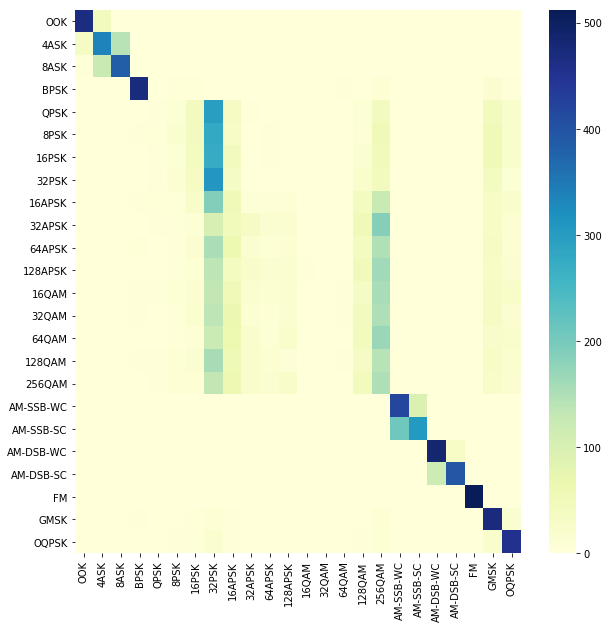


Test set: SNR : 10 , Accuracy: 5350/12288 (43.538%)

snr 10 finished, test acc: 43.5 % 

[0.955078125, 0.697265625, 0.6875, 0.916015625, 0.0, 0.0234375, 0.095703125, 0.490234375, 0.083984375, 0.041015625, 0.0078125, 0.001953125, 0.001953125, 0.0, 0.0, 0.12109375, 0.376953125, 0.837890625, 0.5625, 0.958984375, 0.744140625, 1.0, 0.93359375, 0.912109375]


<Figure size 1800x1800 with 0 Axes>

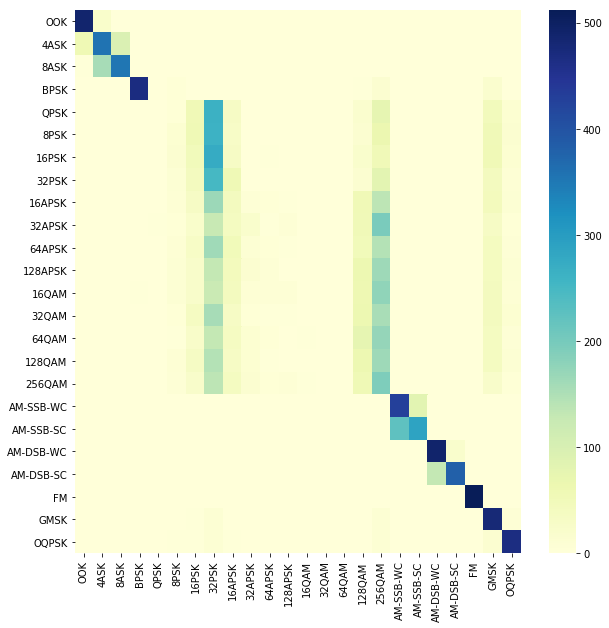


Test set: SNR : 12 , Accuracy: 5448/12288 (44.336%)

snr 12 finished, test acc: 44.3 % 

[0.951171875, 0.703125, 0.61328125, 0.947265625, 0.0, 0.02734375, 0.142578125, 0.568359375, 0.1015625, 0.017578125, 0.0078125, 0.0, 0.005859375, 0.0, 0.0, 0.14453125, 0.3203125, 0.875, 0.568359375, 0.955078125, 0.779296875, 1.0, 0.96484375, 0.947265625]


<Figure size 1800x1800 with 0 Axes>

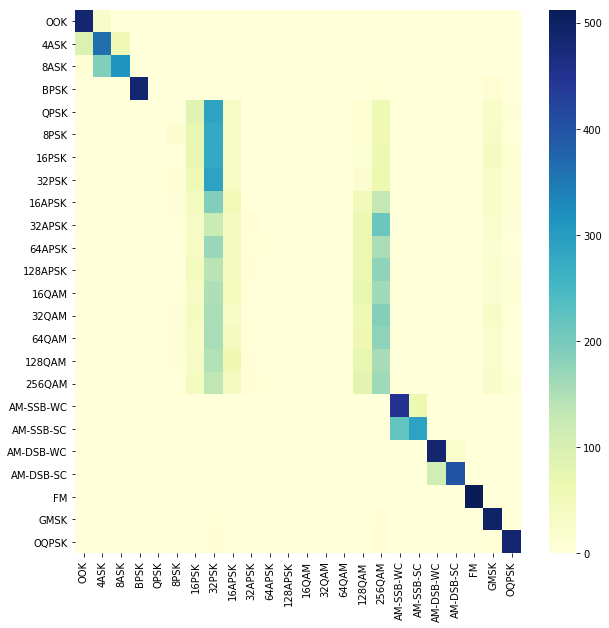


Test set: SNR : 14 , Accuracy: 5457/12288 (44.409%)

snr 14 finished, test acc: 44.4 % 

[0.94921875, 0.69140625, 0.619140625, 0.966796875, 0.001953125, 0.015625, 0.078125, 0.654296875, 0.11328125, 0.015625, 0.0078125, 0.001953125, 0.001953125, 0.0, 0.0, 0.126953125, 0.349609375, 0.826171875, 0.56640625, 0.974609375, 0.755859375, 1.0, 0.98046875, 0.9609375]


<Figure size 1800x1800 with 0 Axes>

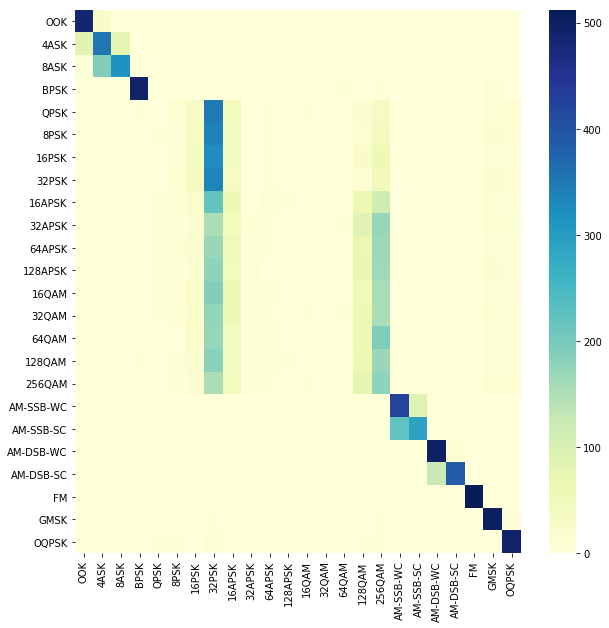


Test set: SNR : 16 , Accuracy: 5482/12288 (44.613%)

snr 16 finished, test acc: 44.6 % 

[0.955078125, 0.69921875, 0.662109375, 0.97265625, 0.00390625, 0.029296875, 0.02734375, 0.681640625, 0.119140625, 0.017578125, 0.0234375, 0.0, 0.00390625, 0.0, 0.001953125, 0.125, 0.333984375, 0.845703125, 0.556640625, 0.974609375, 0.7265625, 1.0, 0.994140625, 0.953125]


<Figure size 1800x1800 with 0 Axes>

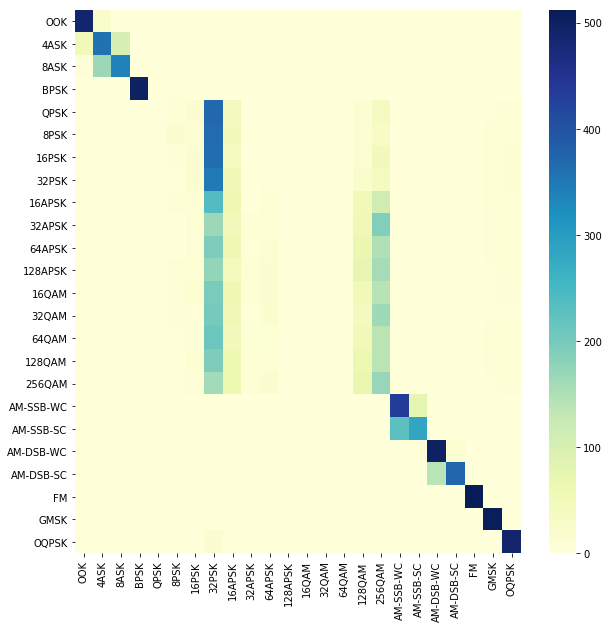


Test set: SNR : 18 , Accuracy: 5462/12288 (44.450%)

snr 18 finished, test acc: 44.4 % 

[0.970703125, 0.681640625, 0.64453125, 0.974609375, 0.015625, 0.015625, 0.021484375, 0.78125, 0.115234375, 0.015625, 0.025390625, 0.001953125, 0.001953125, 0.0, 0.00390625, 0.10546875, 0.28125, 0.806640625, 0.517578125, 0.978515625, 0.7421875, 1.0, 0.99609375, 0.970703125]


<Figure size 1800x1800 with 0 Axes>

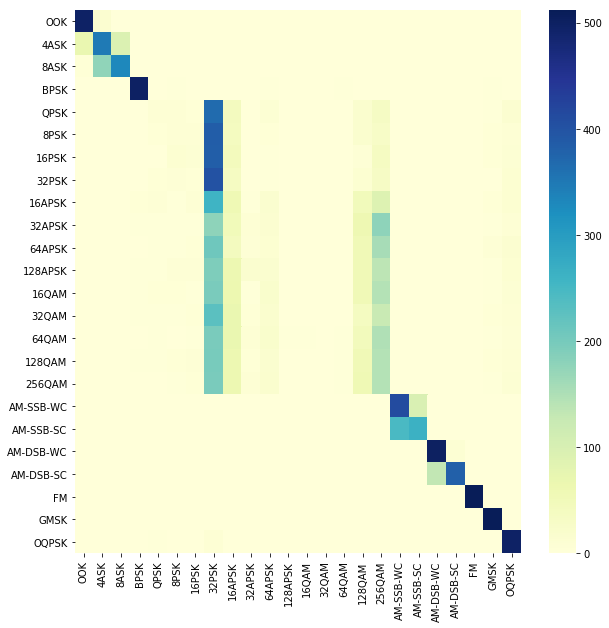


Test set: SNR : 20 , Accuracy: 5502/12288 (44.775%)

snr 20 finished, test acc: 44.8 % 

[0.943359375, 0.69921875, 0.681640625, 0.982421875, 0.013671875, 0.0078125, 0.017578125, 0.7421875, 0.140625, 0.03125, 0.041015625, 0.0, 0.00390625, 0.0, 0.001953125, 0.072265625, 0.3359375, 0.779296875, 0.560546875, 0.98828125, 0.73828125, 1.0, 0.998046875, 0.966796875]


<Figure size 1800x1800 with 0 Axes>

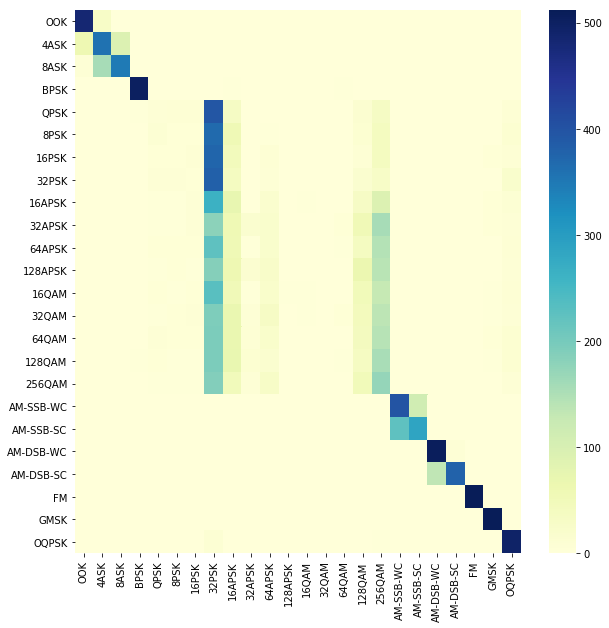


Test set: SNR : 22 , Accuracy: 5477/12288 (44.572%)

snr 22 finished, test acc: 44.6 % 

[0.923828125, 0.662109375, 0.654296875, 0.984375, 0.0078125, 0.009765625, 0.017578125, 0.755859375, 0.130859375, 0.025390625, 0.037109375, 0.001953125, 0.0, 0.0, 0.00390625, 0.08203125, 0.30859375, 0.814453125, 0.578125, 0.978515625, 0.759765625, 1.0, 0.998046875, 0.962890625]


<Figure size 1800x1800 with 0 Axes>

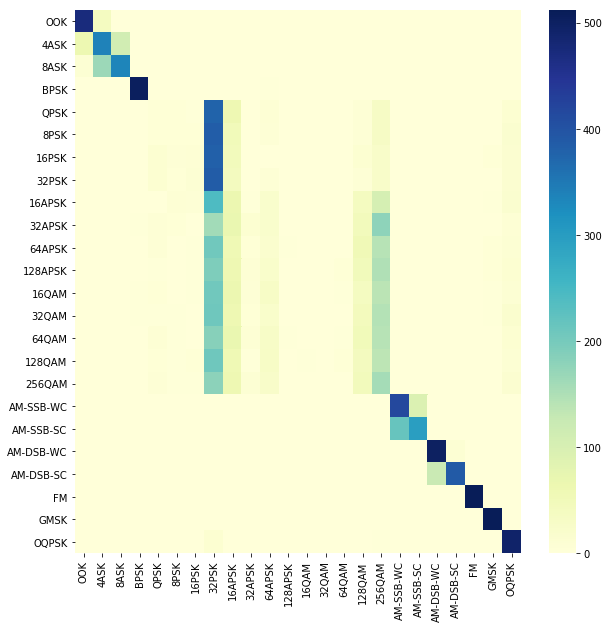


Test set: SNR : 24 , Accuracy: 5517/12288 (44.897%)

snr 24 finished, test acc: 44.9 % 

[0.939453125, 0.685546875, 0.63671875, 0.974609375, 0.013671875, 0.0078125, 0.0078125, 0.765625, 0.16015625, 0.033203125, 0.05078125, 0.001953125, 0.0, 0.0, 0.0, 0.09765625, 0.267578125, 0.8515625, 0.583984375, 0.982421875, 0.7734375, 1.0, 1.0, 0.94140625]


<Figure size 1800x1800 with 0 Axes>

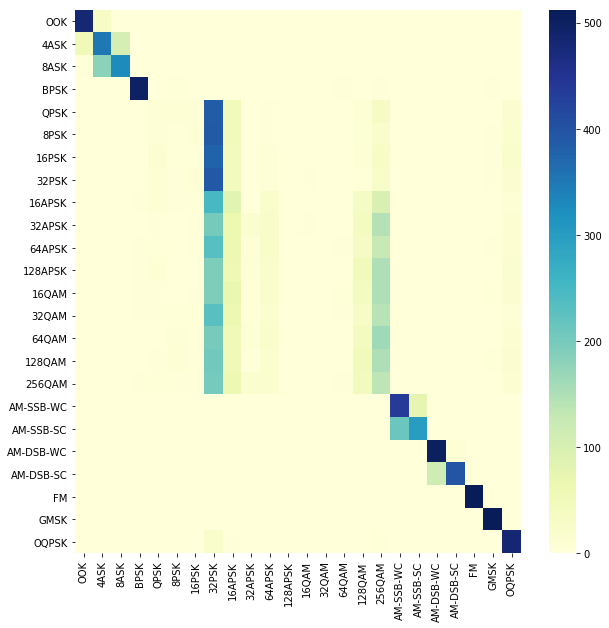


Test set: SNR : 26 , Accuracy: 5500/12288 (44.759%)

snr 26 finished, test acc: 44.8 % 

[0.9296875, 0.689453125, 0.673828125, 0.984375, 0.01953125, 0.01171875, 0.0078125, 0.74609375, 0.11328125, 0.02734375, 0.037109375, 0.0, 0.001953125, 0.0, 0.0, 0.095703125, 0.287109375, 0.86328125, 0.578125, 0.966796875, 0.75, 1.0, 0.998046875, 0.9609375]


<Figure size 1800x1800 with 0 Axes>

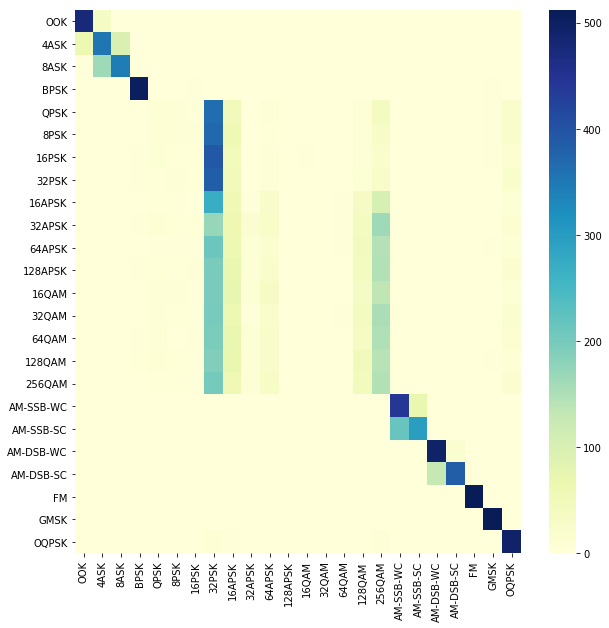


Test set: SNR : 28 , Accuracy: 5472/12288 (44.531%)

snr 28 finished, test acc: 44.5 % 

[0.916015625, 0.697265625, 0.626953125, 0.986328125, 0.017578125, 0.001953125, 0.015625, 0.70703125, 0.126953125, 0.0234375, 0.068359375, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0703125, 0.30078125, 0.841796875, 0.677734375, 0.9609375, 0.693359375, 1.0, 0.990234375, 0.958984375]


<Figure size 1800x1800 with 0 Axes>

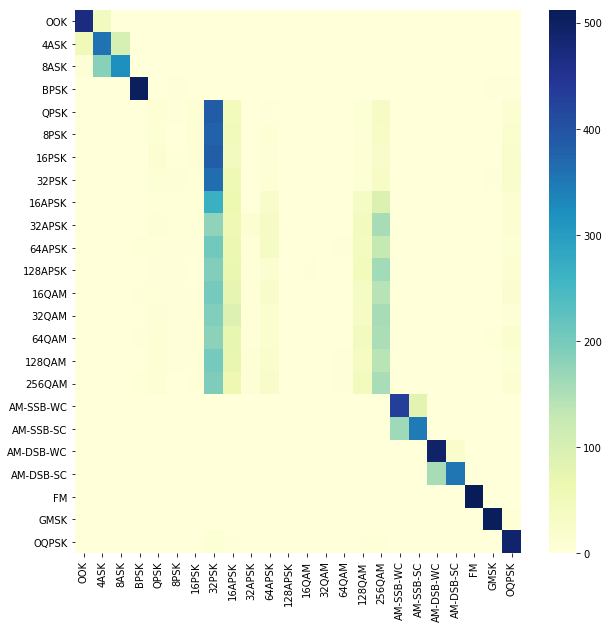


Test set: SNR : 30 , Accuracy: 5524/12288 (44.954%)

snr 30 finished, test acc: 45.0 % 

[0.9296875, 0.673828125, 0.5703125, 0.98828125, 0.0234375, 0.005859375, 0.0078125, 0.74609375, 0.15625, 0.01953125, 0.041015625, 0.001953125, 0.001953125, 0.0, 0.0, 0.068359375, 0.333984375, 0.814453125, 0.740234375, 0.96484375, 0.744140625, 1.0, 0.994140625, 0.962890625]


<Figure size 1800x1800 with 0 Axes>

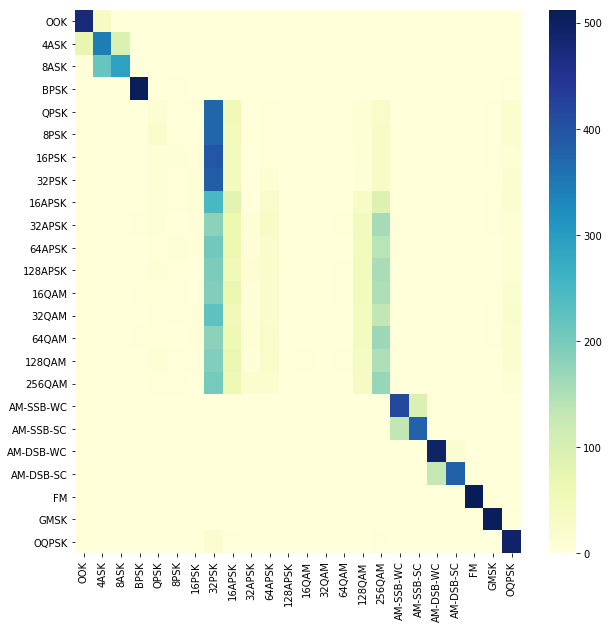

In [18]:
plt.rcParams["figure.figsize"]=10,10
accmat = []

for snr in range( -20, 32, 2 ):
    tidx = list(np.where(snr_test == snr))

    data_test = np.squeeze(data_test0[tidx, :, :], axis=0)
    label_test_y = np.squeeze(label_test0[tidx, :], axis=0)

    data_test = torch.from_numpy(data_test).float()
    label_test = torch.from_numpy(label_test_y).long()

    test_set = utils.TensorDataset(data_test, label_test)
    # estimate classes
    acc, t_predict = test(test_set)
    cr.extend([100 * acc])
    print ('snr %d finished, test acc: %.1f %% \n'  % (snr, 100 * acc))
    
    # F-measure score
    predict = [int(i) for i in t_predict]
    fm.append(list(skm.f1_score(list(np.hstack(label_test_y)), predict, average=None)))
    
    # plot confusion mat
    conf = np.zeros([24,24])
    for i in range(0, label_test_y.shape[0]):
        conf[label_test_y[i],predict[i]] += 1
    # save acc
    accpersnr = []
    for j in range(24):
        accpersnr.extend([float(conf[j,j]/512.0)])
    accmat.append(accpersnr)
    print (accpersnr) 

    df_cm = pd.DataFrame(conf,index = cm_idx, columns = cm_idx)
    plt.figure(figsize = (25,25))
    fig = plt.figure()
    sn.heatmap(df_cm, cmap="YlGnBu")
    plt.show()


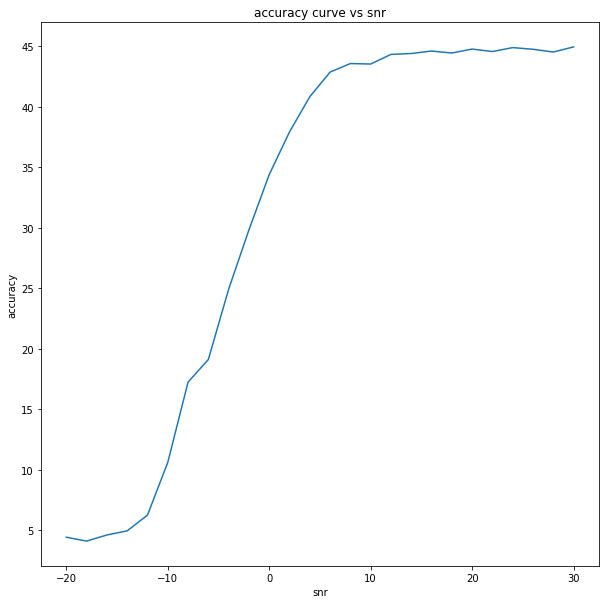

In [19]:
# print overall accuracy curve
plt.plot(range(-20, 32, 2), cr)
plt.title('accuracy curve vs snr')
plt.xlabel('snr')
plt.ylabel('accuracy')
plt.show()

## F1 score of test result

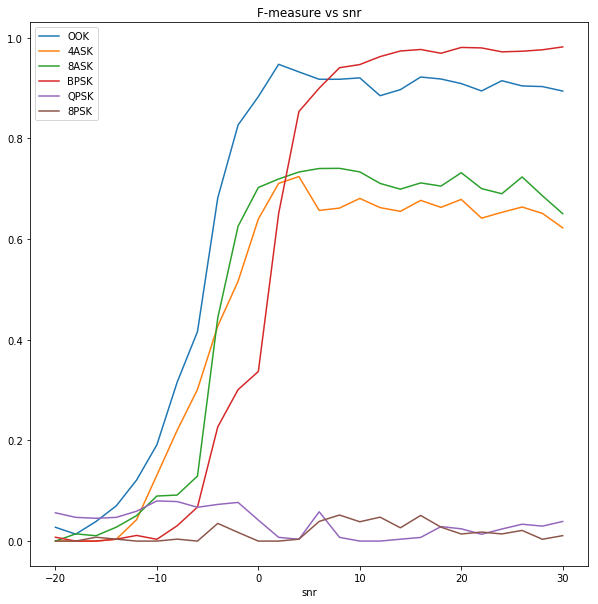

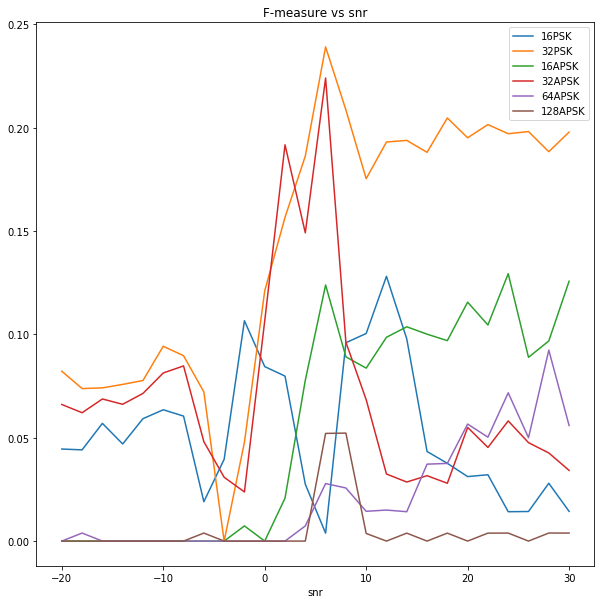

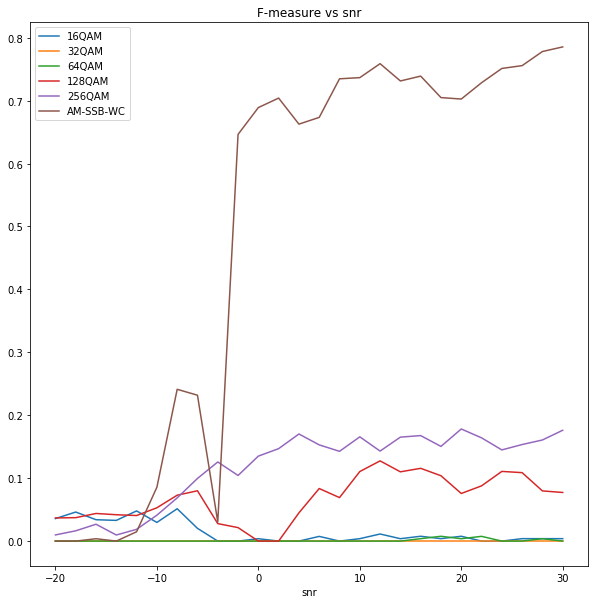

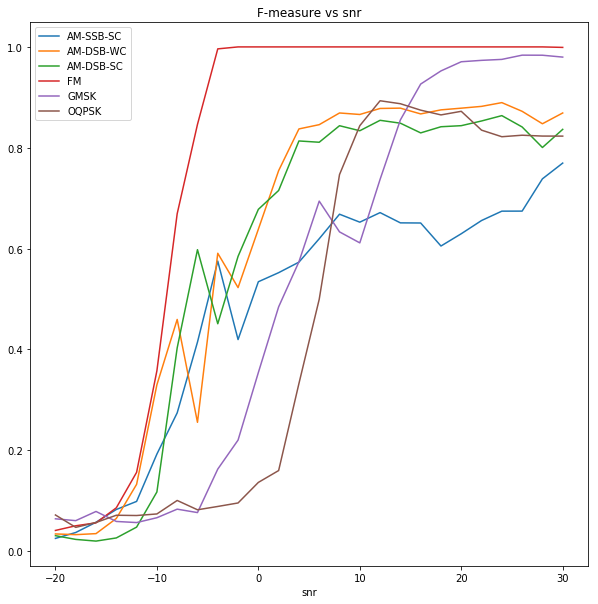

No handles with labels found to put in legend.


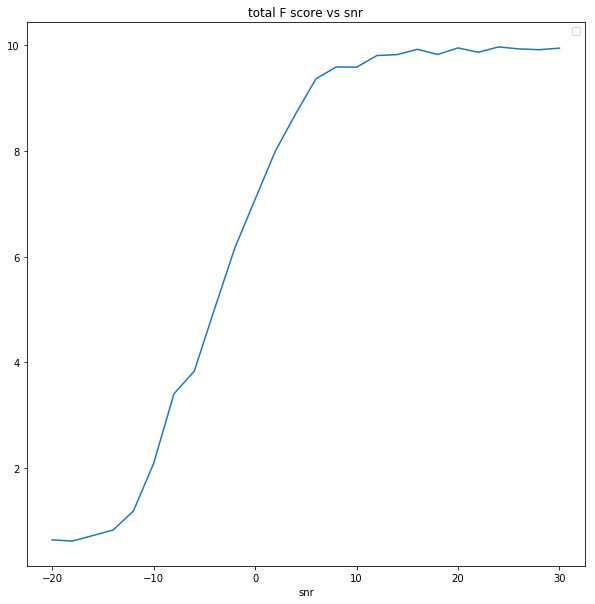

[0.63181495 0.60832266 0.71280752 0.81762633 1.17644214 2.07968766
 3.39789962 3.82748036 5.00480047 6.16173248 7.08365872 8.00014656
 8.70502072 9.3684399  9.59320483 9.58825726 9.8089392  9.82706924
 9.92665028 9.82973568 9.95365795 9.87092756 9.97276465 9.93523923
 9.91971733 9.9489985 ]


In [20]:
fm = np.asarray(fm)
for i in range(4):
    for n in range(6):
        m = i * 6 + n
        plt.plot([[i] for i in range(-20, 32, 2)], fm[:, m], label=cm_idx[m])
        plt.title('F-measure vs snr')
        plt.xlabel('snr')
    plt.legend()
    plt.show()
tt_fs = np.sum(fm, axis=1)
plt.plot([[i] for i in range(-20, 32, 2)], tt_fs)
plt.title('total F score vs snr')
plt.xlabel('snr')
plt.legend()
plt.show()
print (tt_fs)